In [1]:
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sqlalchemy import create_engine

In [2]:
path_to_db_local = 'telecomm_csi.db'
path_to_db_platform = '/datasets/telecomm_csi.db'
path_to_db = None

if os.path.exists(path_to_db_local):
    path_to_db = path_to_db_local
elif os.path.exists(path_to_db_platform):
    path_to_db = path_to_db_platform
else:
    raise Exception('Файл с базой данных SQL не найден!')

if path_to_db:
    engine = create_engine(f'sqlite:///{path_to_db}', echo=False)

In [3]:
# показать все столбцы
pd.options.display.max_columns = None

In [4]:
query = """
SELECT user_id, lt_day, 
    CASE
        WHEN lt_day > 365 THEN 'Old'
        ELSE 'New'
    END as is_new,
    age, gender_segment, os_name, cpe_type_name, country, city, 
    age_s.title as age_segment,
    t_s.title as traffic_segment,
    l_s.title as lifetime_segment,
    nps_score,
    CASE 
        WHEN nps_score >= 9 THEN 'Promoter' 
        WHEN nps_score > 6 AND nps_score <= 8 THEN 'Passive'
        ELSE 'Detractor'
    END as nps_group
FROM user 
JOIN location as loc ON user.location_id = loc.location_id 
JOIN age_segment as age_s ON user.age_gr_id = age_s.age_gr_id
JOIN lifetime_segment as l_s ON user.lt_gr_id = l_s.lt_gr_id
JOIN traffic_segment as t_s ON user.tr_gr_id = t_s.tr_gr_id

"""

In [5]:
df = pd.read_sql(query, engine)
df.head()

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,Old,45.0,1.0,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,04 1-5,08 36+,10,Promoter
1,A001WF,2344,Old,53.0,0.0,ANDROID,SMARTPHONE,Россия,Киров,05 45-54,04 1-5,08 36+,10,Promoter
2,A003Q7,467,Old,57.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,06 55-64,08 20-25,06 13-24,10,Promoter
3,A004TB,4190,Old,44.0,1.0,IOS,SMARTPHONE,Россия,РостовнаДону,04 35-44,03 0.1-1,08 36+,10,Promoter
4,A004XT,1163,Old,24.0,0.0,ANDROID,SMARTPHONE,Россия,Рязань,02 16-24,05 5-10,08 36+,10,Promoter


**Необходимо проверить индексы age_segment, traffic_segment и lifetime_segment на предмет того, являются ли они всегда двузначными**

In [6]:
query_traffic_segment = """

SELECT DISTINCT title as distinct_traffic_segment
FROM traffic_segment 

"""

In [7]:
df = pd.read_sql(query_traffic_segment, engine)
df

,distinct_traffic_segment
0,01 0
1,01 0-0.01
2,02 0.01-0.1
3,03 0.1-1
4,04 1-5
5,05 5-10
6,06 10-15
7,07 15-20
8,08 20-25
9,09 25-30


In [8]:
query_age_segment = """

SELECT DISTINCT age_segment.title as distinct_age_s             
FROM age_segment 

"""

In [9]:
df = pd.read_sql(query_age_segment, engine)
df

,distinct_age_s
0,01 до 16
1,02 16-24
2,03 25-34
3,04 35-44
4,05 45-54
5,06 55-64
6,07 66 +
7,08 n/a


In [10]:
query_lifetime_segment = """

SELECT DISTINCT lifetime_segment.title as distinct_lifetime_s             
FROM lifetime_segment 

"""

In [11]:
df = pd.read_sql(query_lifetime_segment, engine)
df

,distinct_lifetime_s
0,01 1
1,02 2
2,03 3
3,04 4-6
4,05 7-12
5,06 13-24
6,07 25-36
7,08 36+


In [12]:
# срежем индексы age_segment, traffic_segment и lifetime_segment через SUBSTRING()
query = """
SELECT user_id, lt_day, 
    CASE
        WHEN lt_day > 365 THEN 'Old'
        ELSE 'New'
    END as is_new,
    age, gender_segment, os_name, cpe_type_name, country, city, 
    SUBSTRING(age_s.title, 4) as age_segment,
    SUBSTRING(t_s.title, 4) as traffic_segment,
    SUBSTRING(l_s.title, 4) as lifetime_segment,
    nps_score,
    CASE 
        WHEN nps_score >= 9 THEN 'Promoters' 
        WHEN nps_score >= 7 AND nps_score <= 8 THEN 'Passives'
        ELSE 'Detractors'
    END as nps_group
FROM user 
JOIN location as loc ON user.location_id = loc.location_id 
JOIN age_segment as age_s ON user.age_gr_id = age_s.age_gr_id
JOIN lifetime_segment as l_s ON user.lt_gr_id = l_s.lt_gr_id
JOIN traffic_segment as t_s ON user.tr_gr_id = t_s.tr_gr_id

"""

In [13]:
df = pd.read_sql(query, engine)
df

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,Old,45.0,1.0,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,Promoters
1,A001WF,2344,Old,53.0,0.0,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,Promoters
2,A003Q7,467,Old,57.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,Promoters
3,A004TB,4190,Old,44.0,1.0,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,Promoters
4,A004XT,1163,Old,24.0,0.0,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,Promoters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502488,ZZZKLD,1249,Old,54.0,1.0,ANDROID,SMARTPHONE,Россия,Москва,45-54,1-5,36+,5,Detractors
502489,ZZZLWY,129,New,31.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,25-34,1-5,4-6,8,Passives
502490,ZZZQ5F,522,Old,36.0,0.0,ANDROID,SMARTPHONE,Россия,Сургут,35-44,25-30,13-24,10,Promoters
502491,ZZZQ8E,2936,Old,37.0,1.0,ANDROID,SMARTPHONE,Россия,УланУдэ,35-44,65-70,36+,9,Promoters


### Аномальные значения 

In [14]:
df.describe()

,lt_day,age,gender_segment,nps_score
count,502493.000000,501939.000000,501192.000000,502493.000000
mean,1868.841439,39.621946,0.543588,7.508562
std,1683.701762,11.188249,0.498097,3.020378
min,-21.000000,10.000000,0.000000,1.000000
25%,533.000000,31.000000,0.000000,5.000000
50%,1239.000000,38.000000,1.000000,9.000000
75%,3064.000000,47.000000,1.000000,10.000000
max,9162.000000,89.000000,1.000000,10.000000


In [15]:
print('Максимальное количество лет «жизни» клиента состовляет:', round(df['lt_day'].max() / 365), 'лет')

Максимальное количество лет «жизни» клиента состовляет: 25 лет


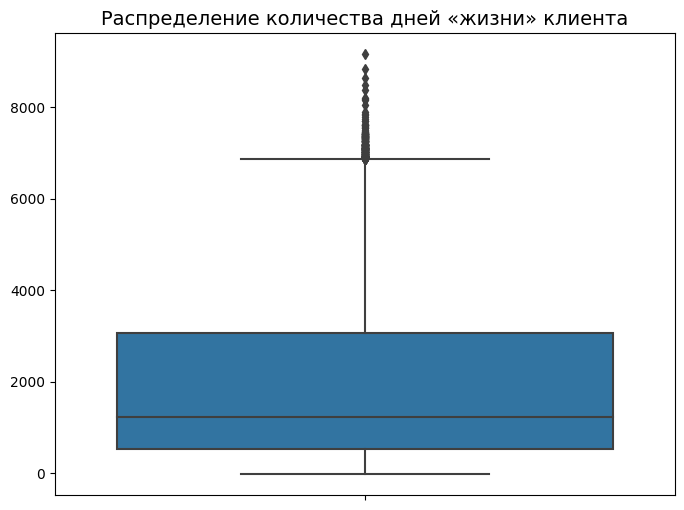

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='lt_day', data=df)

plt.ylabel(None)
plt.xlabel(None)
plt.title('Распределение количества дней «жизни» клиента', fontsize=14)


plt.show()

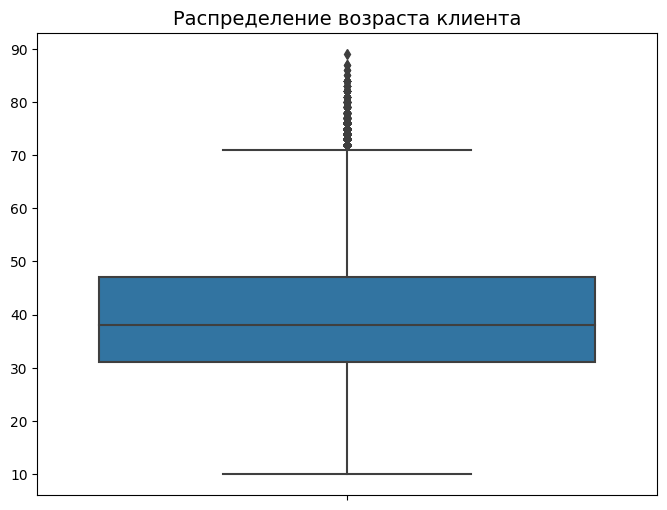

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='age', data=df)

plt.ylabel(None)
plt.xlabel(None)
plt.title('Распределение возраста клиента', fontsize=14)

plt.show()

In [18]:
df_copy = df.copy()
df_copy = df_copy.query('lt_day > 0')

In [19]:
test_df = df_copy[~(df_copy['lt_day'] > np.nanpercentile(df_copy['lt_day'], 99.5))]

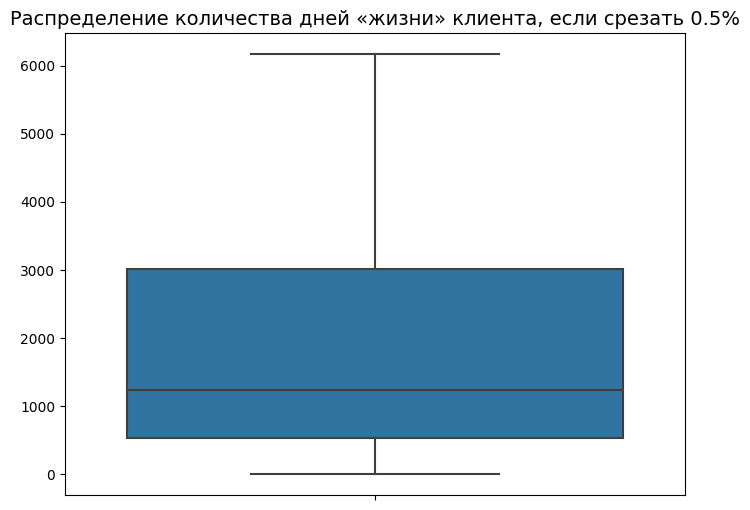

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='lt_day', data=test_df)

plt.ylabel(None)
plt.xlabel(None)
plt.title('Распределение количества дней «жизни» клиента, если срезать 0.5%', fontsize=14)

plt.show()

In [21]:
test_df = test_df[~(test_df['age'] > np.nanpercentile(test_df['age'], 99.5))]

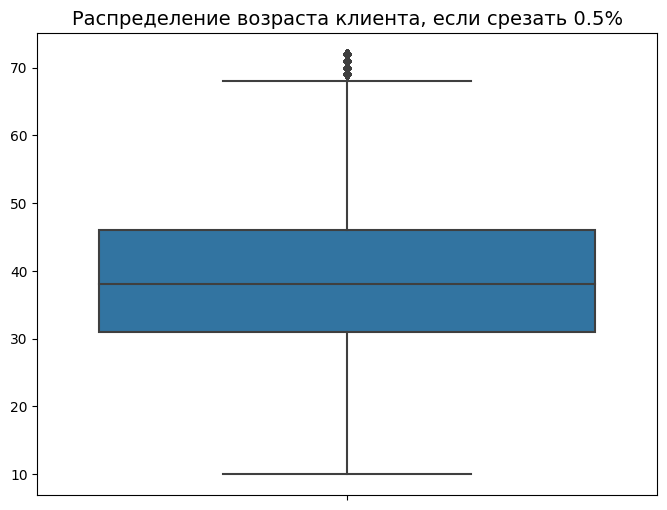

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='age', data=test_df)

plt.ylabel(None)
plt.xlabel(None)
plt.title('Распределение возраста клиента, если срезать 0.5%', fontsize=14)

plt.show()

In [23]:
test_df.describe()

,lt_day,age,gender_segment,nps_score
count,497849.000000,497313.000000,496564.000000,497849.000000
mean,1845.153826,39.423289,0.543227,7.505278
std,1655.962322,10.955539,0.498128,3.021245
min,1.000000,10.000000,0.000000,1.000000
25%,529.000000,31.000000,0.000000,5.000000
50%,1230.000000,38.000000,1.000000,9.000000
75%,3018.000000,46.000000,1.000000,10.000000
max,6168.000000,72.000000,1.000000,10.000000


In [24]:
print('Если будет срезаны 0,5% выбросов, то потери составят:', round(100-test_df.count()[0]/df.count()[0]*100, 2), '% или',
     df.count()[0] -test_df.count()[0], 'строк')

Если будет срезаны 0,5% выбросов, то потери составят: 0.92 % или 4644 строк


**Можно уменьшить количество выбросов в данных на 0.5%, а также исключить отрицательные числа из рассмотрения.**

### Пропуски и дубликаты

In [25]:
loss_percentage = round(df.isna().sum() / df.isna().count() * 100, 1).reset_index()
loss_percentage.columns = ['columns', 'precent']
loss_percentage['count'] = df.isna().sum().reset_index()[0]

In [26]:
def color_non_zero(value):
    if value != 0:
        return 'background-color: lightgreen'
    else:
        return ''

In [27]:
styled_df = loss_percentage.style.applymap(color_non_zero, subset=['precent', 'count'])
styled_df

,columns,precent,count
0,user_id,0.000000,0
1,lt_day,0.000000,0
2,is_new,0.000000,0
3,age,0.100000,554
4,gender_segment,0.300000,1301
5,os_name,0.000000,0
6,cpe_type_name,0.000000,0
7,country,0.000000,0
8,city,0.000000,0
9,age_segment,0.000000,0


In [28]:
f'явных дубликатов: {df.duplicated().sum()} шт.' 

'явных дубликатов: 0 шт.'

In [29]:
df[df['user_id'].duplicated(keep=False)]

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group


**Пропуски в данных нельзя заполнить, так как user_id уникален, и нет других признаков для определения пропущенных значений.
Нет явных дубликатов строк.**

In [30]:
df.describe()

,lt_day,age,gender_segment,nps_score
count,502493.000000,501939.000000,501192.000000,502493.000000
mean,1868.841439,39.621946,0.543588,7.508562
std,1683.701762,11.188249,0.498097,3.020378
min,-21.000000,10.000000,0.000000,1.000000
25%,533.000000,31.000000,0.000000,5.000000
50%,1239.000000,38.000000,1.000000,9.000000
75%,3064.000000,47.000000,1.000000,10.000000
max,9162.000000,89.000000,1.000000,10.000000


**Новый запрос**<a id=New_request></a>

In [31]:

# изменил пол клиентов 
# возраст привел к целому числу и отфильтровал 

query = """
SELECT user_id, lt_day, 
    CASE
        WHEN lt_day > 365 THEN 'Old'
        ELSE 'New'
    END as is_new,
    CAST(age AS int) as age, 
    CASE 
        WHEN gender_segment = 1 THEN 'женщина'
        ELSE 'мужчина'
    END as gender_segment, 
    os_name, cpe_type_name, country, city, 
    SUBSTRING(age_s.title, 4) as age_segment,
    SUBSTRING(t_s.title, 4) as traffic_segment,
    SUBSTRING(l_s.title, 4) as lifetime_segment,
    nps_score,
    CASE 
        WHEN nps_score >= 9 THEN 'Promoters' 
        WHEN nps_score >= 7 AND nps_score <= 8 THEN 'Passives'
        ELSE 'Detractors'
    END as nps_group
FROM user 
JOIN location as loc ON user.location_id = loc.location_id 
JOIN age_segment as age_s ON user.age_gr_id = age_s.age_gr_id
JOIN lifetime_segment as l_s ON user.lt_gr_id = l_s.lt_gr_id
JOIN traffic_segment as t_s ON user.tr_gr_id = t_s.tr_gr_id
WHERE lt_day > 0 AND lt_day <= 6168 
    AND age IS NOT NULL AND age <= 72 
    AND gender_segment IS NOT NULL
    
"""

In [32]:
df = pd.read_sql(query, engine)
df

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,Old,45,женщина,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,Promoters
1,A001WF,2344,Old,53,мужчина,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,Promoters
2,A003Q7,467,Old,57,мужчина,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,Promoters
3,A004TB,4190,Old,44,женщина,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,Promoters
4,A004XT,1163,Old,24,мужчина,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,Promoters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496521,ZZZKLD,1249,Old,54,женщина,ANDROID,SMARTPHONE,Россия,Москва,45-54,1-5,36+,5,Detractors
496522,ZZZLWY,129,New,31,мужчина,ANDROID,SMARTPHONE,Россия,Москва,25-34,1-5,4-6,8,Passives
496523,ZZZQ5F,522,Old,36,мужчина,ANDROID,SMARTPHONE,Россия,Сургут,35-44,25-30,13-24,10,Promoters
496524,ZZZQ8E,2936,Old,37,женщина,ANDROID,SMARTPHONE,Россия,УланУдэ,35-44,65-70,36+,9,Promoters


In [33]:
df.describe()

,lt_day,age,nps_score
count,496526.000000,496526.000000,496526.000000
mean,1847.476464,39.435385,7.508503
std,1655.950933,10.956095,3.018932
min,2.000000,10.000000,1.000000
25%,531.000000,31.000000,5.000000
50%,1232.000000,38.000000,9.000000
75%,3022.000000,46.000000,10.000000
max,6168.000000,72.000000,10.000000


In [34]:
df.isna().sum()

user_id             0
lt_day              0
is_new              0
age                 0
gender_segment      0
os_name             0
cpe_type_name       0
country             0
city                0
age_segment         0
traffic_segment     0
lifetime_segment    0
nps_score           0
nps_group           0
dtype: int64

In [35]:
df.to_csv('Tableau_prefabricated_project.csv', index=False)

**[Ссылка на Tableau](https://public.tableau.com/views/Mysecondbook_17093073379130/sheet2?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)**